<a href="https://colab.research.google.com/github/AlexLeoShin/SeminarGit/blob/main/m7_t5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
h = pd.read_csv('/content/drive/MyDrive/Модуль 7 Машинное обучение/heart_ssz.tsv', sep='\t')
feature_names=h.columns.tolist()
print(h.head(3))
print(feature_names)
print(h.shape)

   ID  Бронхиальная астма  ЛПНП  Возраст алког  Работа  ВИЧ/СПИД  \
0   0                   0  2.79           18.0       1         0   
1   1                   0  6.62            NaN       0         0   
2   2                   0  3.17           17.0       0         0   

        Статус Курения  Пассивное курение  Переломы Время пробуждения  ...  \
0                Курит                  0         0          06:00:00  ...   
1  Никогда не курил(а)                  0         1          04:00:00  ...   
2  Никогда не курил(а)                  1         0          07:00:00  ...   

   Сон после обеда  Время засыпания  Хроническое заболевание легких  \
0                0         22:00:00                               0   
1                1         00:00:00                               0   
2                0         23:00:00                               0   

   Сигарет в день                                        Образование  \
0            20.0  3 - средняя школа / закон.среднее / вы

In [3]:
nc = h.select_dtypes(include=['int64', 'float64']).columns
print(len(nc),' числовых признаков: \n',nc)
cc = h.select_dtypes(include=['object']).columns
print(len(cc),' категориальных признаков: \n',cc)

30  числовых признаков: 
 Index(['ID', 'Бронхиальная астма', 'ЛПНП', 'Возраст алког', 'Работа',
       'ВИЧ/СПИД', 'Пассивное курение', 'Переломы', 'ЛПВП', 'Выход на пенсию',
       'Холестерин', 'Артериальная гипертония', 'Триглицериды', 'Гепатит',
       'Сахарный диабет', 'Спорт, клубы', 'Религия, клубы', 'Возраст курения',
       'Туберкулез легких', 'Онкология', 'Травмы за год',
       'Регулярный прием лекарственных средств', 'Глюкоза плазмы натощак',
       'Абдоминальное ожирение, см', 'Сон после обеда',
       'Хроническое заболевание легких', 'Сигарет в день',
       'Индекс массы тела, кг/м^2', 'Прекращение работы по болезни', 'ССЗ'],
      dtype='object')
12  категориальных признаков: 
 Index(['Статус Курения', 'Время пробуждения', 'Пол', 'Семья',
       'Частота пасс кур', 'Этнос', 'Национальность', 'Алкоголь',
       'Время засыпания', 'Образование', 'Религия', 'Профессия'],
      dtype='object')


In [5]:
# Просмотр распределения целевого признака
print("В %-соотношении:")
proc=h['ССЗ'].value_counts(normalize=True) * 100
print(proc.round(2))

В %-соотношении:
ССЗ
1    55.13
0    44.87
Name: proportion, dtype: float64


In [6]:
#Просмотр числа уникальных значений каждого признака
print("Количество уникальных значений в каждом столбце:")
print(h.nunique())

Количество уникальных значений в каждом столбце:
ID                                        956
Бронхиальная астма                          2
ЛПНП                                      439
Возраст алког                              35
Работа                                      2
ВИЧ/СПИД                                    2
Статус Курения                              3
Пассивное курение                           2
Переломы                                    2
Время пробуждения                          34
ЛПВП                                      160
Выход на пенсию                             2
Холестерин                                 57
Артериальная гипертония                     2
Триглицериды                              394
Гепатит                                     2
Сахарный диабет                             2
Пол                                         2
Спорт, клубы                                2
Семья                                       6
Религия, клубы                 

In [8]:
import numpy as np

# Проверка на константные значения
constant_features = h.columns[h.nunique() == 1].tolist()
print("Константные признаки:", constant_features)

from collections import Counter

quasi_constant = []
for col in h.columns:
    value_counts = h[col].value_counts(normalize=True)
    top_freq = value_counts.iloc[0]  # доля самого частого значения
    if top_freq > 0.97:
        quasi_constant.append(col)

print("Почти константные признаки:", quasi_constant)

high_cardinality = []
for col in h.select_dtypes(include=[np.number]).columns:
    if h[col].nunique() / len(h) > 0.9:  # более 90% уникальных
        high_cardinality.append(col)

print("Признаки с высокой уникальностью (возможно, ID):", high_cardinality)

#Просмотр признаков с пропущенными значениями
missing=h.isnull().sum()
missing = missing[missing > 0]
print('Признаки с пропусками:\n',missing)
missing_ratio = (h.isnull().sum() / len(h)) * 100
high_missing = missing_ratio[missing_ratio > 50]  # больше 50% пропусков
print("Признаки с >50% пропусков:")
print(high_missing)


Константные признаки: []
Почти константные признаки: ['ВИЧ/СПИД', 'Религия, клубы', 'Туберкулез легких', 'Этнос']
Признаки с высокой уникальностью (возможно, ID): ['ID']
Признаки с пропусками:
 Возраст алког       168
Пол                   2
Частота пасс кур    732
Возраст курения     544
Сигарет в день      547
dtype: int64
Признаки с >50% пропусков:
Частота пасс кур    76.569038
Возраст курения     56.903766
Сигарет в день      57.217573
dtype: float64


In [9]:
# Замена числовых признаков — медианой (устойчива к выбросам)
h[nc] = h[nc].fillna(h[nc].median(numeric_only=True))

# Замена категориальных — модой (наиболее частым значением)
for col in cc:
    h[col] = h[col].fillna(h[col].mode()[0] if not h[col].mode().empty else 'Unknown')
print('Процент пропущенных значений - ',(h.isnull().sum() / len(h)) * 100)
print(h.shape)

Процент пропущенных значений -  ID                                        0.0
Бронхиальная астма                        0.0
ЛПНП                                      0.0
Возраст алког                             0.0
Работа                                    0.0
ВИЧ/СПИД                                  0.0
Статус Курения                            0.0
Пассивное курение                         0.0
Переломы                                  0.0
Время пробуждения                         0.0
ЛПВП                                      0.0
Выход на пенсию                           0.0
Холестерин                                0.0
Артериальная гипертония                   0.0
Триглицериды                              0.0
Гепатит                                   0.0
Сахарный диабет                           0.0
Пол                                       0.0
Спорт, клубы                              0.0
Семья                                     0.0
Религия, клубы                            0.0
Ча

In [21]:
hd = h[h.duplicated(subset=list(h.columns))]
print(f'Число найденных дубликатов: {hd.shape[0]}')
h = h.drop_duplicates()
h.shape

Число найденных дубликатов: 0


(955, 36)

In [25]:
#Удаляем неинформативные признаки
columns_to_drop = ['ID','ВИЧ/СПИД','Религия, клубы','Туберкулез легких','Этнос','Религия']
existing_columns = [col for col in columns_to_drop if col in h.columns]
h = h.drop(columns=existing_columns, axis=1)
print(h.shape)

(955, 36)


Уникальные значения признака:
Профессия
2     225
4     138
7     123
9      90
8      89
0      81
10     80
5      72
6      35
3      17
1       5
Name: count, dtype: int64


<Figure size 1400x600 with 0 Axes>

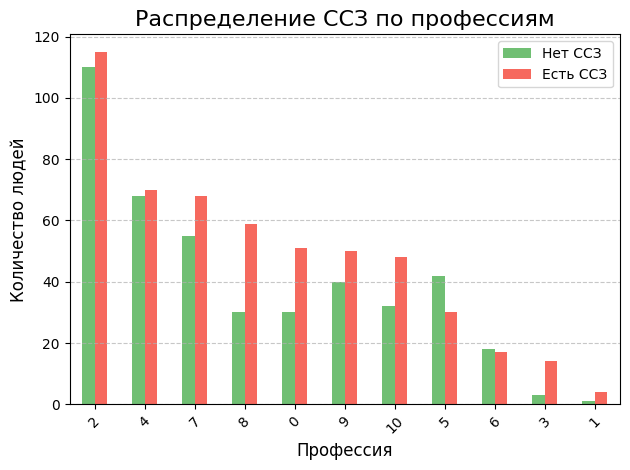

In [45]:


print("Уникальные значения признака:")
print(h['Профессия'].value_counts())
# Считаем количество людей по профессии и ССЗ
grouped = h.groupby(['Профессия', 'ССЗ']).size().unstack(fill_value=0)

# Переименуем столбцы для ясности
grouped = grouped.rename(columns={0: 'Нет ССЗ', 1: 'Есть ССЗ'})
# Сортируем профессии по убыванию числа пациентов с ССЗ = 1
grouped = grouped.sort_values(by='Есть ССЗ', ascending=False)
# Настройка графика
plt.figure(figsize=(14, 6))
grouped.plot(kind='bar', color=['#4CAF50', '#F44336'], alpha=0.8)
plt.title('Распределение ССЗ по профессиям', fontsize=16)
plt.xlabel('Профессия', fontsize=12)
plt.ylabel('Количество людей', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(['Нет ССЗ', 'Есть ССЗ'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show();

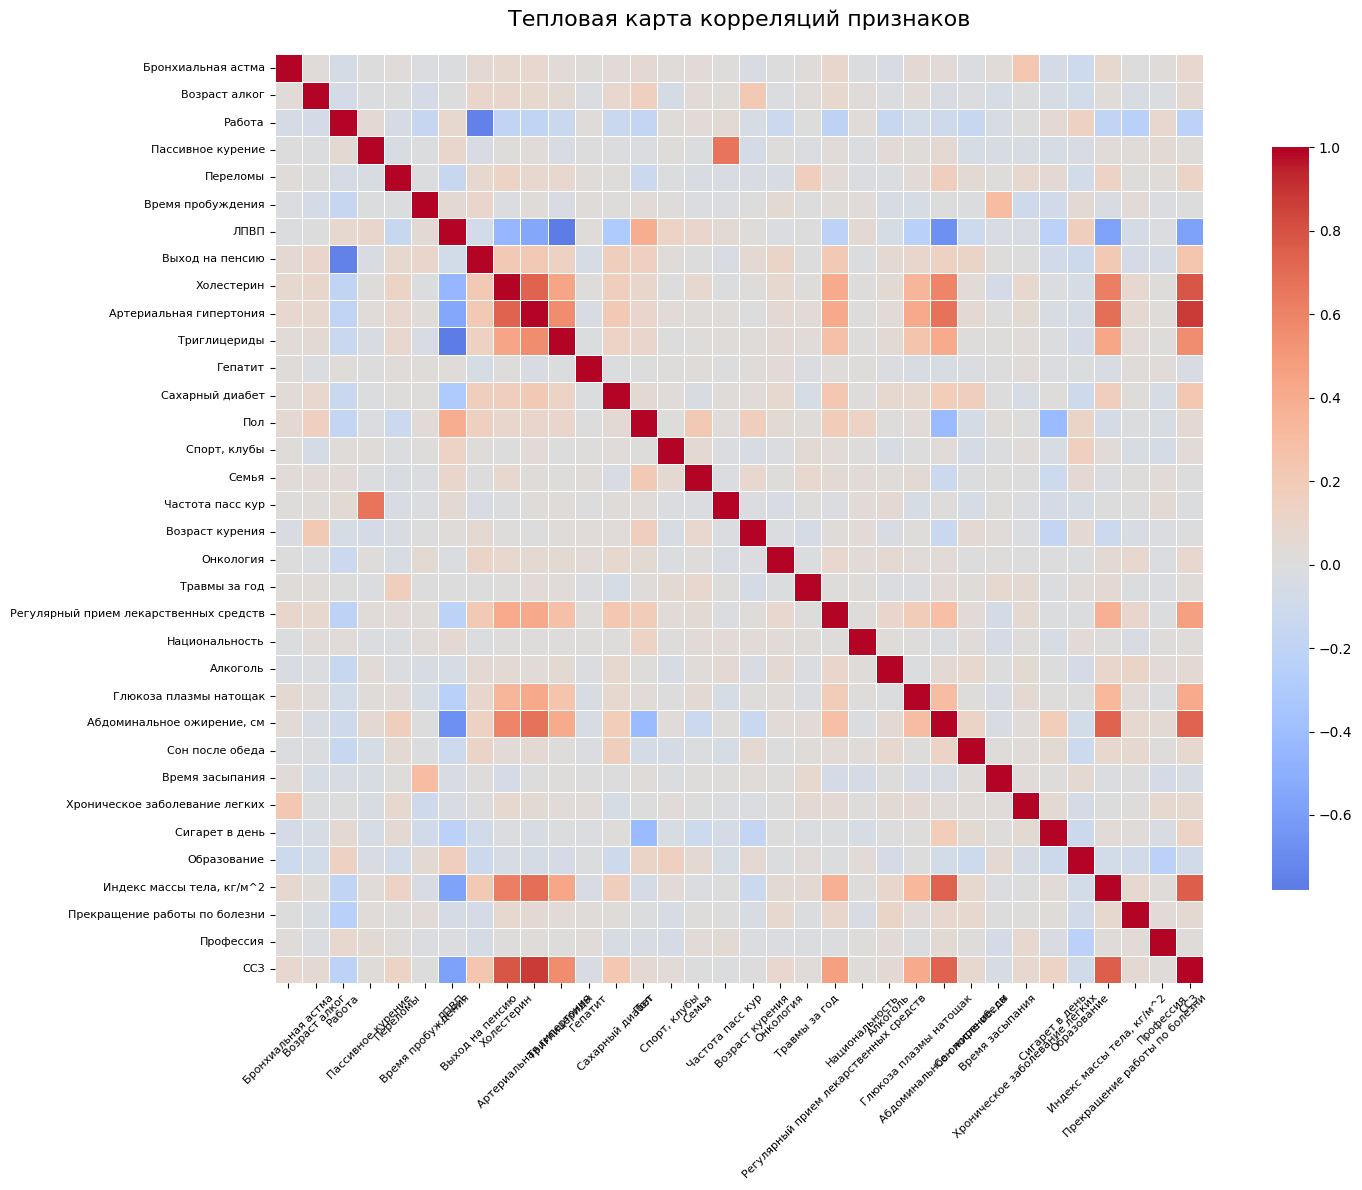

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Вычисляем матрицу корреляции (по Пирсону)
correlation_matrix = h.corr(method='pearson', numeric_only=True).round(2)


plt.figure(figsize=(16, 12))
# Построение тепловой карты
sns.heatmap(correlation_matrix,annot=False,cmap='coolwarm',center=0,square=True, linewidths=0.5,cbar_kws={"shrink": 0.8})

plt.title('Тепловая карта корреляций признаков', fontsize=16, pad=20)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show();

In [30]:
# Найдём пары с сильной корреляцией
# Порог сильной корреляции
threshold = 0.7

# Создаём маску: только |корреляция| > threshold и не диагональ
high_corr = np.abs(correlation_matrix) > threshold
# Находим пары
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if high_corr.iloc[i, j]:
            corr_value = correlation_matrix.iloc[i, j]
            high_corr_pairs.append([
                correlation_matrix.index[i],
                correlation_matrix.columns[j],
                corr_value
            ])

# Преобразуем в DataFrame
high_corr_h = pd.DataFrame(high_corr_pairs, columns=['Признак 1', 'Признак 2', 'Корреляция'])
high_corr_h = high_corr_h.sort_values(by='Корреляция', key=abs, ascending=False).reset_index(drop=True)

print("Признаки с сильной корреляцией (|r| > 0.7):")
print(high_corr_h)

Признаки с сильной корреляцией (|r| > 0.7):
                    Признак 1                  Признак 2  Корреляция
0                        ЛПНП                 Холестерин        0.95
1     Артериальная гипертония                        ССЗ        0.88
2                        ЛПВП               Триглицериды       -0.78
3                  Холестерин                        ССЗ        0.78
4   Индекс массы тела, кг/м^2                        ССЗ        0.75
5  Абдоминальное ожирение, см  Индекс массы тела, кг/м^2        0.74
6                      Работа            Выход на пенсию       -0.74
7                  Холестерин    Артериальная гипертония        0.73
8  Абдоминальное ожирение, см                        ССЗ        0.73


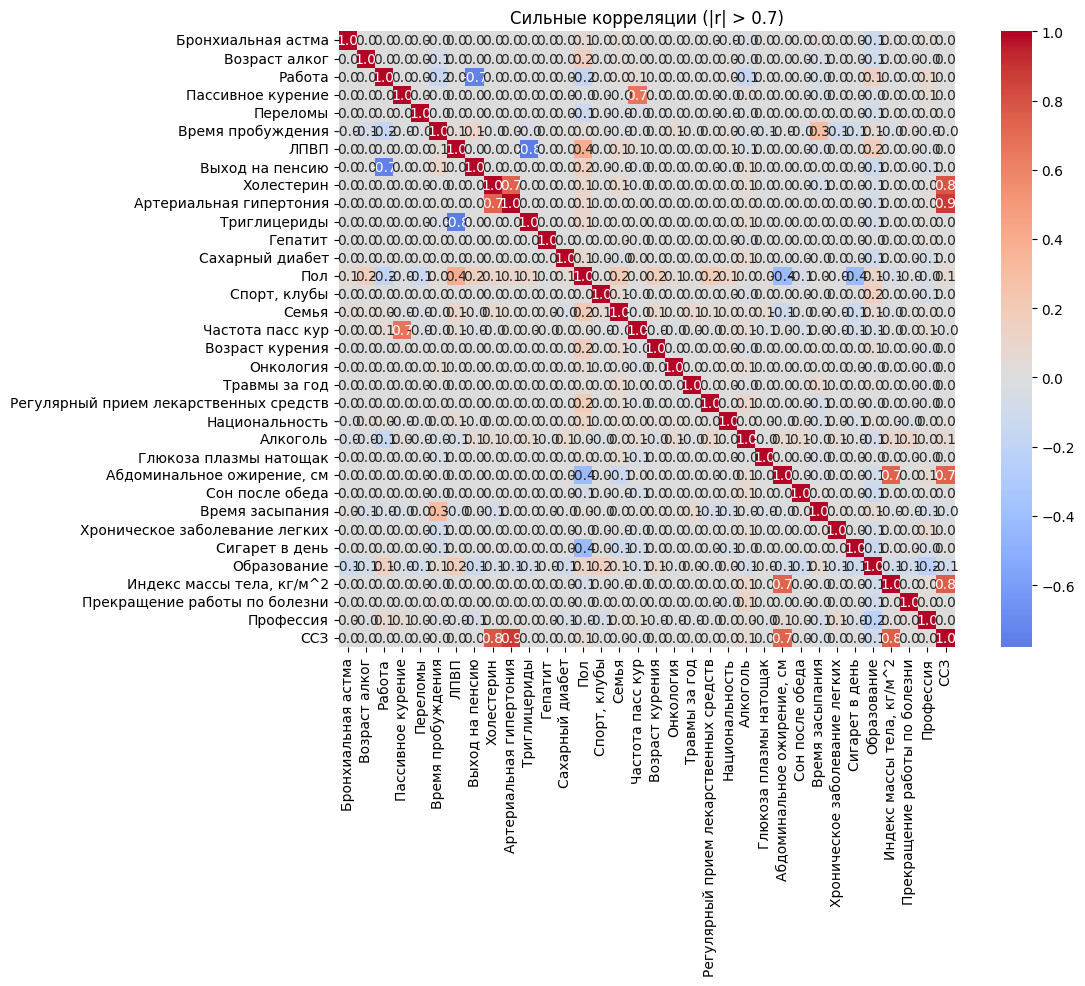

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Фильтруем матрицу: только сильные корреляции
filtered_corr = correlation_matrix.copy()
filtered_corr[high_corr == False] = 0

plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr, annot=True,cmap='coolwarm',center=0, square=True,fmt='.1f')
plt.title('Сильные корреляции (|r| > 0.7)')
plt.show();

In [32]:
h = h.drop(columns=['ЛПНП','Статус Курения'], axis=1)
h.shape

(955, 34)

In [33]:
from scipy.stats import pointbiserialr

# Для бинарной целевой переменной (ССЗ)
target = 'ССЗ'
numeric_features =h.select_dtypes(include=[np.number]).columns.drop(target)

correlations = {}
for col in numeric_features:
    corr, _ = pointbiserialr(h[target], h[col])
    correlations[col] = abs(corr)

# Сортируем по убыванию
sorted_corr = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
print("Топ-15 признаков по корреляции:")
for feat, corr in sorted_corr[:15]:
    print(f"{feat}: {corr:.3f}")

Топ-15 признаков по корреляции:
Артериальная гипертония: 0.876
Холестерин: 0.785
Индекс массы тела, кг/м^2: 0.746
Абдоминальное ожирение, см: 0.733
ЛПВП: 0.581
Триглицериды: 0.560
Регулярный прием лекарственных средств: 0.465
Глюкоза плазмы натощак: 0.410
Выход на пенсию: 0.244
Сахарный диабет: 0.228
Работа: 0.217
Переломы: 0.123
Сигарет в день: 0.115
Онкология: 0.084
Бронхиальная астма: 0.077


In [34]:
from sklearn.feature_selection import f_classif, SelectKBest

X = h.drop(columns=[target])
y = h[target]

# Кодируем категориальные признаки
X_encoded = pd.get_dummies(X, drop_first=True)

# Выбираем топ-15 признаков по F-тесту
selector = SelectKBest(f_classif, k=15)
X_selected = selector.fit_transform(X_encoded, y)

# Какие признаки отобраны?
selected_features = X_encoded.columns[selector.get_support()].tolist()
print('Отобранные признаки (', len(selected_features),'): ', selected_features)

Отобранные признаки ( 15 ):  ['Работа', 'Переломы', 'ЛПВП', 'Выход на пенсию', 'Холестерин', 'Артериальная гипертония', 'Триглицериды', 'Сахарный диабет', 'Регулярный прием лекарственных средств', 'Глюкоза плазмы натощак', 'Абдоминальное ожирение, см', 'Сигарет в день', 'Индекс массы тела, кг/м^2', 'Семья_вдовец / вдова', 'Образование_5 - ВУЗ']


In [35]:
# % распределения категориальных данных в наборе
cc = h.select_dtypes(include=['object']).columns
for col in cc:
    counts = h[col].value_counts()
    percents = h[col].value_counts(normalize=True) * 100
    distribution = pd.DataFrame({'Частота': counts, 'Процент (%)': percents.round(2)})
    print(f"\nРаспределение в '{col}':")
    print(distribution)


Распределение в 'Время пробуждения':
                   Частота  Процент (%)
Время пробуждения                      
06:00:00               233        24.40
07:00:00               222        23.25
08:00:00               136        14.24
06:30:00                72         7.54
09:00:00                67         7.02
05:30:00                51         5.34
05:00:00                37         3.87
07:30:00                37         3.87
10:00:00                27         2.83
04:00:00                15         1.57
08:30:00                15         1.57
04:30:00                 6         0.63
09:30:00                 4         0.42
12:00:00                 4         0.42
11:00:00                 3         0.31
06:20:00                 3         0.31
06:15:00                 3         0.31
03:00:00                 2         0.21
06:40:00                 2         0.21
07:20:00                 2         0.21
06:03:00                 1         0.10
04:40:00                 1         0.10
06

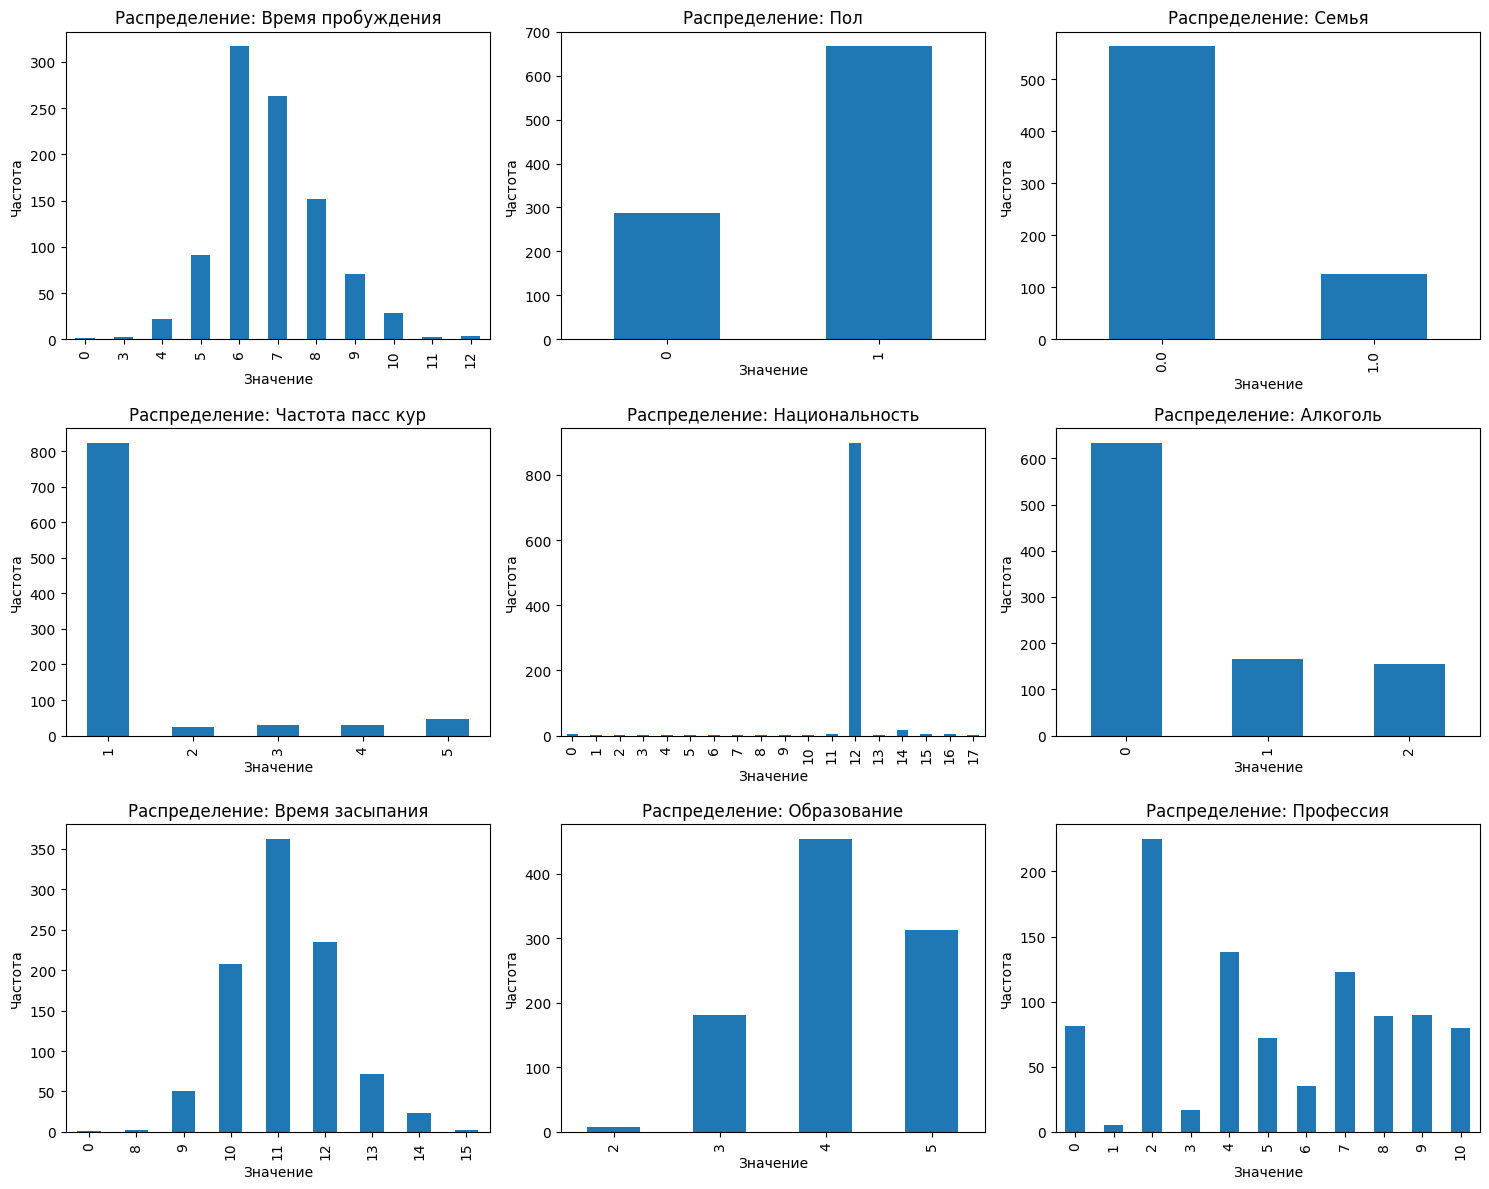

In [48]:
import matplotlib.pyplot as plt
# Графическое отображение распределения категориальных признаков
n_cols = 3
n_rows = (len(cc) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cc):
    ax = axes[i]
    h[col].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(f'Распределение: {col}')
    ax.set_xlabel('Значение')
    ax.set_ylabel('Частота')
    ax.tick_params(axis='x', rotation=90)

# Скрыть пустые подграфики
for i in range(len(cc), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show();

In [37]:
# Обработка категориальных признаков
h['Пол'] = h['Пол'].map({'М': 0, 'Ж': 1})
h['Частота пасс кур'] = h['Частота пасс кур'].map({'0': 0,'1-2 раза в неделю': 1,'3-6 раз в неделю': 2,'не менее 1 раза в день': 3,'2-3 раза в день': 4,'4 и более раз в день': 5})
h['Семья'] = h['Семья'].map({'в браке в настоящее время': 0,'в разводе': 1})
h['Алкоголь'] = h['Алкоголь'].map({'употребляю в настоящее время': 0,'никогда не употреблял': 1,'ранее употреблял': 2})
h['Образование'] = h['Образование'].str[:1].astype(int)
h['Время пробуждения'] = h['Время пробуждения'].str[:2].astype(int)
h['Время засыпания'] = (h['Время засыпания'].str[:2].astype(int) + 12) % 24
h.head()

,Бронхиальная астма,Возраст алког,Работа,Пассивное курение,Переломы,Время пробуждения,ЛПВП,Выход на пенсию,Холестерин,Артериальная гипертония,...,"Абдоминальное ожирение, см",Сон после обеда,Время засыпания,Хроническое заболевание легких,Сигарет в день,Образование,"Индекс массы тела, кг/м^2",Прекращение работы по болезни,Профессия,ССЗ
0,0,18.0,1,0,0,6,0.97,0,4.0,0,...,82.3,0,10,0,20.0,3,25.1,0,низкоквалифицированные работники,0
1,0,19.0,0,0,1,4,0.74,0,8.6,0,...,87.6,1,12,0,10.0,5,35.2,0,дипломированные специалисты,1
2,0,17.0,0,1,0,7,1.57,0,5.2,0,...,67.5,0,11,0,10.0,5,19.0,0,дипломированные специалисты,0
3,0,13.0,1,1,0,7,0.68,0,4.9,1,...,93.1,0,11,0,10.0,3,31.6,0,низкоквалифицированные работники,1
4,0,16.0,0,1,1,6,1.01,0,8.2,1,...,84.6,0,11,0,10.0,3,32.8,1,операторы и монтажники установок и машинного о...,1


In [38]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

encoded_data = encoder.fit_transform(h[['Национальность']])
encoded_columns = encoder.get_feature_names_out(['Национальность'])
encoded_h = pd.DataFrame(encoded_data, columns=encoded_columns, index=h.index)
h_new= h.drop(columns=['Национальность']).join(encoded_h)

print(f"Итоговый размер h_new: {h_new.shape}")
h_new.head()

Итоговый размер h_new: (955, 50)


,Бронхиальная астма,Возраст алког,Работа,Пассивное курение,Переломы,Время пробуждения,ЛПВП,Выход на пенсию,Холестерин,Артериальная гипертония,...,Национальность_Киргизы,Национальность_Молдаване,Национальность_Мордва,Национальность_Немцы,Национальность_Русские,Национальность_Таджики,Национальность_Татары,Национальность_Украинцы,Национальность_Чуваши,Национальность_Эстонцы
0,0,18.0,1,0,0,6,0.97,0,4.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,19.0,0,0,1,4,0.74,0,8.6,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,17.0,0,1,0,7,1.57,0,5.2,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,13.0,1,1,0,7,0.68,0,4.9,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,16.0,0,1,1,6,1.01,0,8.2,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [39]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
h['Профессия'] = label_encoder.fit_transform(h['Профессия'])
h['Национальность'] = label_encoder.fit_transform(h['Национальность'])
print(h['Профессия'].value_counts())
print(h['Национальность'].value_counts())
print(f"Итоговый размер h: {h.shape}")

Профессия
2     225
4     138
7     123
9      90
8      89
0      81
10     80
5      72
6      35
3      17
1       5
Name: count, dtype: int64
Национальность
12    899
14     18
11      6
16      5
0       4
15      4
10      2
5       2
7       2
8       2
6       2
13      2
1       2
17      1
9       1
3       1
2       1
4       1
Name: count, dtype: int64
Итоговый размер h: (955, 34)


In [40]:
h.head()

,Бронхиальная астма,Возраст алког,Работа,Пассивное курение,Переломы,Время пробуждения,ЛПВП,Выход на пенсию,Холестерин,Артериальная гипертония,...,"Абдоминальное ожирение, см",Сон после обеда,Время засыпания,Хроническое заболевание легких,Сигарет в день,Образование,"Индекс массы тела, кг/м^2",Прекращение работы по болезни,Профессия,ССЗ
0,0,18.0,1,0,0,6,0.97,0,4.0,0,...,82.3,0,10,0,20.0,3,25.1,0,4,0
1,0,19.0,0,0,1,4,0.74,0,8.6,0,...,87.6,1,12,0,10.0,5,35.2,0,2,1
2,0,17.0,0,1,0,7,1.57,0,5.2,0,...,67.5,0,11,0,10.0,5,19.0,0,2,0
3,0,13.0,1,1,0,7,0.68,0,4.9,1,...,93.1,0,11,0,10.0,3,31.6,0,4,1
4,0,16.0,0,1,1,6,1.01,0,8.2,1,...,84.6,0,11,0,10.0,3,32.8,1,5,1


In [41]:
#выгрузка результирующего csv-файла
h.to_csv('heart_out.csv',encoding='utf-8')

In [42]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier  # или другая модель
from sklearn.model_selection import train_test_split

df = pd.read_csv('heart_out.csv', header=None)

X = h.drop(['ССЗ'], axis=1)
y = h['ССЗ'].values

# Разделение на train/test (RFE работает на обучающей выборке)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Выбираем модель, на основе которой будет отбор
model = RandomForestClassifier(n_estimators=50, random_state=42)

# Создаём RFE: оставить 15 самых важных признаков
rfe = RFE(estimator=model, n_features_to_select=15)

# Обучаем RFE (он рекурсивно удаляет признаки)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Имена отобранных признаков
selected_features = X.columns[rfe.support_].tolist()

print("Отобранные признаки:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature}")

# Ранги признаков (1 = самый важный, >1 = менее важные)
print("\nРанги признаков:")
ranks = pd.DataFrame({'Признак': X.columns, 'Ранг': rfe.ranking_})
print(ranks.sort_values(by='Ранг'))

# Обучим модель на отобранных признаках
model.fit(X_train_rfe, y_train)
score = model.score(X_test_rfe, y_test)

print(f"Точность модели на тесте: {score:.3f}")

Отобранные признаки:
1. Возраст алког
2. Время пробуждения
3. ЛПВП
4. Холестерин
5. Артериальная гипертония
6. Триглицериды
7. Пол
8. Возраст курения
9. Регулярный прием лекарственных средств
10. Глюкоза плазмы натощак
11. Абдоминальное ожирение, см
12. Время засыпания
13. Сигарет в день
14. Индекс массы тела, кг/м^2
15. Профессия

Ранги признаков:
                                   Признак  Ранг
1                            Возраст алког     1
5                        Время пробуждения     1
6                                     ЛПВП     1
8                               Холестерин     1
13                                     Пол     1
10                            Триглицериды     1
9                  Артериальная гипертония     1
17                         Возраст курения     1
24              Абдоминальное ожирение, см     1
26                         Время засыпания     1
30               Индекс массы тела, кг/м^2     1
28                          Сигарет в день     1
20  Регулярн